<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Copy_of_Tukey_test_letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drawing a 'BOXPLOT' graph

Includes letters, showing the significant differences between variants, derived by the means of the Tukey's test.

1) importing of the libraries

In [ ]:
import pandas as pd
import numpy as np

'''
from scipy.stats import tukey_hsd
from pandas.core.describe import DataFrameDescriber
from statsmodels.formula.api import ols
from statsmodels.stats.multitest import multipletests
'''
df = pd.read_csv("/content/tukey.csv", delimiter=';', decimal=',')

2) arranging the data by samples column-wise and taking out the names of the variants in a different array

In [ ]:
names = df.pop('groups')
dff = df.T

names = np.array(names)
print(names)

['251/18' '1' '251/3b' '251/8' '251/3p' '125/20' '254/11' '254/17'
 '125/16' '25?15' '425/12' '425/18' '254/4' '425*25' '6' '28/1' '28/15'
 '4']


Converting the 2-D pandas dataframe into a 1-D numpy array. ```numpy.append(array1, array2) ``` can be used to append two arrays.

Probably ```pandas.dataframe.pop()``` can be used as well.

In [ ]:
from matplotlib.patches import namedtuple
#convert dataframe to matrix
conv_arr= dff.values

#split matrix into 3 columns each into 1d array
arr1 = np.delete(conv_arr,[1,2],axis=0)
arr2 = np.delete(conv_arr,[0,2],axis=0)
arr3 = np.delete(conv_arr,[0,1],axis=0)

'''
arr4 = np.delete(conv_arr,[0,1,2,4],axis=0)
arr5 = np.delete(conv_arr,[0,1,2,3],axis=0)
'''
#converting into 1D array
arr1 = arr1.ravel()
arr2 = arr2.ravel()
arr3 = arr3.ravel()
'''
arr4 = arr4.ravel()
arr5 = arr5.ravel()
'''
arra = np.append(arr1, arr2)

'''
arrb = np.append(arr3, arr4)
arr = np.append(arra, arrb)
'''
arr = np.append(arra, arr3)

print(arr)

# variants as well:
named1 = np.append(names, names)
'''
named2 = np.append(names, names)
named = np.append(named1, named2)
'''
named = np.append(named1, names)
print(named)

[3.934 7.18  3.691 5.529 5.515 5.119 5.386 7.265 5.551 6.038 3.733 3.861
 9.314 5.12  6.546 3.858 4.31  4.876 4.792 7.302 4.393 6.008 5.618 3.564
 3.822 8.905 6.082 5.635 3.156 2.331 8.437 5.417 6.355 4.847 3.642 4.172
 4.117 6.742 3.729 5.534 5.445 5.196 4.797 8.431 6.172 5.429 3.247 3.583
 8.237 5.66  6.68  3.648 3.373 4.18 ]
['251/18' '1' '251/3b' '251/8' '251/3p' '125/20' '254/11' '254/17'
 '125/16' '25?15' '425/12' '425/18' '254/4' '425*25' '6' '28/1' '28/15'
 '4' '251/18' '1' '251/3b' '251/8' '251/3p' '125/20' '254/11' '254/17'
 '125/16' '25?15' '425/12' '425/18' '254/4' '425*25' '6' '28/1' '28/15'
 '4' '251/18' '1' '251/3b' '251/8' '251/3p' '125/20' '254/11' '254/17'
 '125/16' '25?15' '425/12' '425/18' '254/4' '425*25' '6' '28/1' '28/15'
 '4']


In [ ]:
# Sample data (replace this with your data)
data = pd.DataFrame({
    'Variant': named,
    'Value': arr
})

3) performing the co-variance test
(the following is a variant, showing the t-test)

In [ ]:
import itertools

# Get unique variants from the DataFrame
variants = data['Variant'].unique()

# Create all unique combinations of variants in pairs
variant_pairs = sorted(list(itertools.combinations(variants, 2)))

In [ ]:
import scipy.stats as stats

significant_pairs = []

for pair in variant_pairs:
    group1 = data[data['Variant'] == pair[0]]['Value']
    group2 = data[data['Variant'] == pair[1]]['Value']

    _, p_value = stats.ttest_ind(group1, group2)

    if p_value < 0.05:
        significant_pairs.append((pair[0], pair[1]))


4) This is a very simple code, showing a Tukey's test analysis and printing the summarized data

In [ ]:
import statsmodels.stats.multicomp as mc

# Perform one-way ANOVA to check for significant differences
model = mc.MultiComparison(data['Value'], data['Variant'])
result = model.tukeyhsd()

print(result.summary(), len(result.reject))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1 125/16  -1.1397 0.4334 -2.7402  0.4608  False
     1 125/20  -2.4483 0.0002 -4.0488 -0.8478   True
     1 251/18  -2.7937    0.0 -4.3942 -1.1932   True
     1 251/3b   -3.137    0.0 -4.7375 -1.5365   True
     1 251/3p  -1.5487 0.0669 -3.1492  0.0518  False
     1  251/8  -1.3843 0.1569 -2.9848  0.2162  False
     1 254/11  -2.4063 0.0003 -4.0068 -0.8058   True
     1 254/17   1.1257 0.4542 -0.4748  2.7262  False
     1  254/4    1.588 0.0537 -0.0125  3.1885  False
     1  25?15   -1.374 0.1649 -2.9745  0.2265  False
     1   28/1   -2.957    0.0 -4.5575 -1.3565   True
     1  28/15  -3.2997    0.0 -4.9002 -1.6992   True
     1      4  -2.6653    0.0 -4.2658 -1.0648   True
     1 425*25  -1.6757 0.0323 -3.2762 -0.0752   True
     1 425/12   -3.696    0.0 -5.2965 -2.0955   True
     1 425/18  -3.8163    0.0 -5.4168 -2.2158 

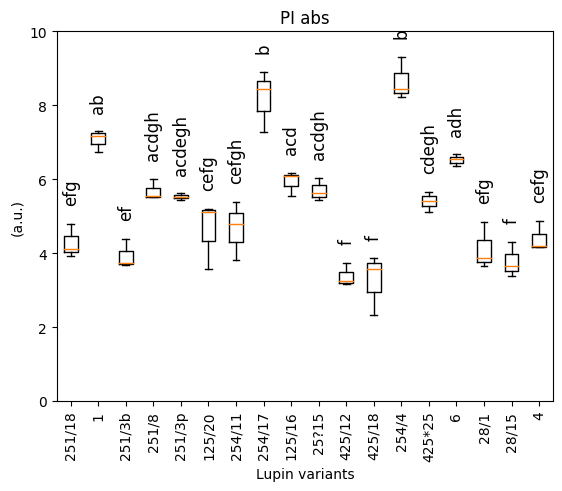

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

ax.boxplot([dff[0], dff[1], dff[2], dff[3], dff[4], dff[5], dff[6],
            dff[7], dff[8], dff[9], dff[10], dff[11], dff[12],
            dff[13], dff[14], dff[15], dff[16], dff[17]])
letters = [
    'efg', 'ab', 'ef', 'acdgh', 'acdegh', 'cefg', 'cefgh',
    'b', 'acd', 'acdgh', 'f', 'f', 'b', 'cdegh',
    'adh', 'efg', 'f', 'cefg'
]
'''
letters = [
    'a', 'b', 'a', 'c', 'c', 'c',
    'ac', 'b', 'c', 'c', 'd', 'a',
    'b', 'c', 'f', 'a', 'a', 'a'
]

letters = [
    'a', 'b', 'c', 'd', 'c', 'abcd', 'abcd',
    'bd', 'a', 'a', 'abcd', 'cd', 'cd', 'bcd',
    'bcd', 'cd', 'cd', 'ab'
]
'''

for i, group in enumerate(data['Variant'].unique()):
    letter = letters[i]
    y_pos = data[data['Variant'] == group]['Value'].max() + 0.5
    ax.text(i + 1, y_pos, f"{letter}", ha='center', va='bottom', fontsize=12, rotation = 90)

ax.set_xticklabels(names, rotation = 90)
ax.set_ylim([0, 10])

ax.set(title='PI abs', ylabel='(a.u.)', xlabel="Lupin variants")

plt.show()

In [ ]:
import itertools
import scipy.stats as stats
import statsmodels.stats.multicomp as mc

# Sample data (replace this with your data)
data = pd.DataFrame({
    'Variant': named,
    'Value': arr
})

# Get unique variants from the DataFrame
variants = data['Variant'].unique()

# Create all unique combinations of variants in pairs
variant_pairs = sorted(list(itertools.combinations(variants, 2)))

# Perform Tukey's test on each variant pair
significant_pairs = []
non_significant_pairs = []
annotated = []
n = 0
comparator = ''

for pair in variant_pairs:
    group1 = data[data['Variant'] == pair[0]]['Value']
    group2 = data[data['Variant'] == pair[1]]['Value']

    _, p_value = stats.ttest_ind(group1, group2)

    if p_value < 0.05:
        significant_pairs.append((pair[0], pair[1]))

    else:
        if comparator != pair[0]:
            comparator = pair[0]
            n += 1
        letter = chr(65 + n)
        non_significant_pairs.append((pair[0], pair[1]))
        annotated.append((letter, pair[1]))

r = {}

for pair in significant_pairs:
    variant_i, variant_j = pair
    if variant_i in r.keys():
        r[variant_i].append(variant_j)
    else:
        r[variant_i] = [variant_j]



'''
for i in len(result.reject):
    print(result.groups[i])
'''

'''
n = 0

for variant_a in data['Variant']:
    l = chr(65 + n)
    for i in len(result.reject):
    if !result.reject[i] and variant_a ==

    print(k, r[k])

for p in r:
    print(p, r[p])

'''

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1 125/16  -1.1397 0.4334 -2.7402  0.4608  False
     1 125/20  -2.4483 0.0002 -4.0488 -0.8478   True
     1 251/18  -2.7937    0.0 -4.3942 -1.1932   True
     1 251/3b   -3.137    0.0 -4.7375 -1.5365   True
     1 251/3p  -1.5487 0.0669 -3.1492  0.0518  False
     1  251/8  -1.3843 0.1569 -2.9848  0.2162  False
     1 254/11  -2.4063 0.0003 -4.0068 -0.8058   True
     1 254/17   1.1257 0.4542 -0.4748  2.7262  False
     1  254/4    1.588 0.0537 -0.0125  3.1885  False
     1  25?15   -1.374 0.1649 -2.9745  0.2265  False
     1   28/1   -2.957    0.0 -4.5575 -1.3565   True
     1  28/15  -3.2997    0.0 -4.9002 -1.6992   True
     1      4  -2.6653    0.0 -4.2658 -1.0648   True
     1 425*25  -1.6757 0.0323 -3.2762 -0.0752   True
     1 425/12   -3.696    0.0 -5.2965 -2.0955   True
     1 425/18  -3.8163    0.0 -5.4168 -2.2158 

"\nn = 0\n\nfor variant_a in data['Variant']:\n    l = chr(65 + n)\n    for i in len(result.reject): \n    if !result.reject[i] and variant_a == \n\n    print(k, r[k])\n\nfor p in r:\n    print(p, r[p])\n\n"

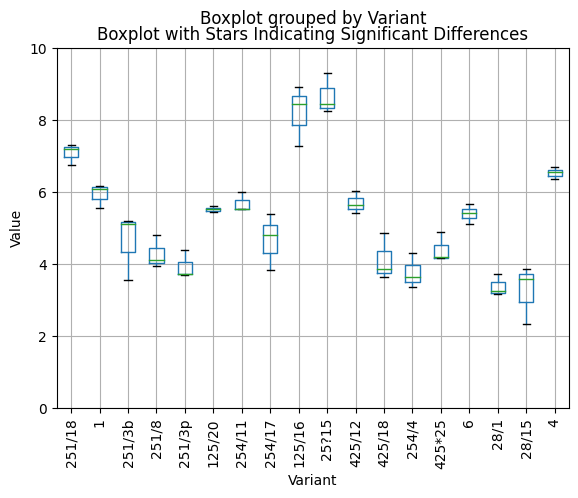

In [ ]:
import matplotlib.pyplot as plt

# Create a plot with stars indicating significant differences
fig, ax = plt.subplots()
data.boxplot(column='Value', by='Variant', ax=ax)

# Add stars to indicate significant differences
for i, group in enumerate(data['Variant'].unique()):
    letter = r.get(i)
    y_pos = data[data['Variant'] == group]['Value'].max() + 0.5
    ax.text(i + 1, y_pos, f"{letter}", ha='center', va='bottom', fontsize=12)


ax.set_xticklabels(names, rotation = 90)
ax.set_ylim([0, 10])
plt.title("Boxplot with Stars Indicating Significant Differences")
plt.xlabel("Variant")
plt.ylabel("Value")
plt.show()


In [ ]:

res = []
for pair in annotated:
    #print(pair[1])
    if pair[1] not in res:
        res.append((pair[1]))
r = []
for p in res:
    for pair in annotated:
        if pair[1] == p:
            r.append((pair[0], p))
            print (pair[0], p)




B 251/3b
B 125/20
D 125/20
E 125/20
F 125/20
B 254/11
D 254/11
E 254/11
F 254/11
G 254/11
B 425/18
D 425/18
G 425/18
H 425/18
L 425/18
B 28/1
D 28/1
G 28/1
H 28/1
L 28/1
M 28/1
B 28/15
D 28/15
G 28/15
H 28/15
L 28/15
M 28/15
N 28/15
B 4
D 4
G 4
H 4
M 4
N 4
O 4
C 254/17
D 425/12
G 425/12
H 425/12
E 251/3p
E 125/16
F 125/16
G 125/16
H 125/16
E 25?15
F 25?15
G 25?15
H 25?15
J 25?15
E 425*25
F 425*25
G 425*25
H 425*25
J 425*25
K 425*25
I 254/4
J 6


In [ ]:
print(result.summary())

for i in range(len(variant_pairs)):
    v_1, v_2 = variant_pairs[i]
    print((v_1, v_2))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1 125/16  -1.1397 0.4334 -2.7402  0.4608  False
     1 125/20  -2.4483 0.0002 -4.0488 -0.8478   True
     1 251/18  -2.7937    0.0 -4.3942 -1.1932   True
     1 251/3b   -3.137    0.0 -4.7375 -1.5365   True
     1 251/3p  -1.5487 0.0669 -3.1492  0.0518  False
     1  251/8  -1.3843 0.1569 -2.9848  0.2162  False
     1 254/11  -2.4063 0.0003 -4.0068 -0.8058   True
     1 254/17   1.1257 0.4542 -0.4748  2.7262  False
     1  254/4    1.588 0.0537 -0.0125  3.1885  False
     1  25?15   -1.374 0.1649 -2.9745  0.2265  False
     1   28/1   -2.957    0.0 -4.5575 -1.3565   True
     1  28/15  -3.2997    0.0 -4.9002 -1.6992   True
     1      4  -2.6653    0.0 -4.2658 -1.0648   True
     1 425*25  -1.6757 0.0323 -3.2762 -0.0752   True
     1 425/12   -3.696    0.0 -5.2965 -2.0955   True
     1 425/18  -3.8163    0.0 -5.4168 -2.2158 

In [ ]:
r = {}
for i in len(variant_pairs):
    v_1, v_2 = variant_pairs[i]
    if !result.reject[i]:
        r[v_1] = [v_2]

for v_1 in len(named):
    for v_2 in len(named)-1:
        if r.keys() == v_1:
            r[v_1].append()

153
251/18 ['251/18', '125/20', '254/11', '125/16', '25?15', '425/12', '4']
1 ['1', '125/20', '254/11', '254/17', '425/12', '425*25', '6', '4']
251/3b ['251/3b', '251/3p', '125/20', '254/11', '254/17', '425/12', '425/18', '254/4', '425*25', '6', '28/1', '28/15']
251/8 ['251/8', '125/20', '254/11', '254/17', '425/12', '425/18', '254/4', '425*25', '6', '28/1', '28/15']
251/3p ['251/3p', '254/17', '425/18', '254/4', '425*25', '6', '28/1', '28/15']
125/20 ['125/20', '254/17', '425/12', '425/18', '425*25', '6', '4']
254/11 ['254/11', '425/12', '425/18', '425*25', '6', '4']
254/17 ['254/17', '425/18', '254/4', '425*25', '6', '28/1', '28/15']
125/16 ['125/16']
425/12 ['425/12', '425*25', '6', '4']
425/18 ['425/18', '425*25', '6', '28/1', '28/15']
254/4 ['254/4', '28/1', '28/15']
425*25 ['425*25', '28/1', '28/15']
6 ['6']
28/1 ['28/1']


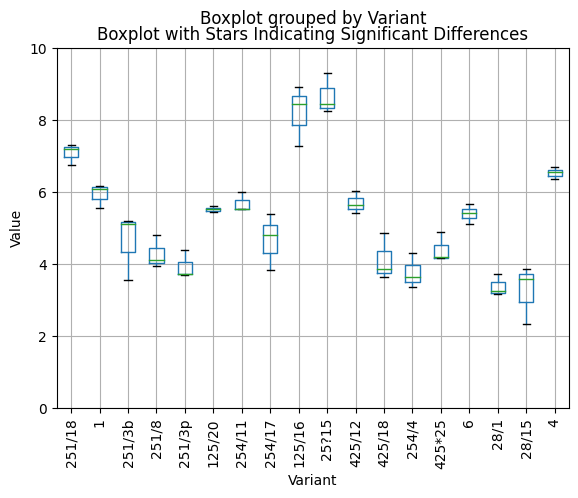

In [ ]:
import statsmodels.stats.multicomp as mc
from string import ascii_uppercase

# Sample data (replace this with your data)

# Get unique variants from the DataFrame
variants = data['Variant'].unique()

# Create all unique combinations of variants in pairs
variant_pairs = list(itertools.combinations(variants, 2))
print(len(variant_pairs))
# Perform Tukey's test on each variant pair
model = mc.MultiComparison(data['Value'], data['Variant'])
result = model.tukeyhsd()
#print(result.summary())

# Extract significant variant pairs and their corresponding letters

n = 0
from collections import defaultdict
res = defaultdict(list)

for i in range(len(variant_pairs)):
    if not result.reject[i]:
        variant_i, variant_j = variant_pairs[i]
        if variant_i in res.keys():
            res[variant_i].append(variant_j)
        else:
            res[variant_i] = [variant_i]

for k, v in res.items():

    #res[k] = res[chr(65+n)]

    print(k, v)
    #n+=1
'''
from collections import defaultdict

r = defaultdict(list)

for k, v in res.items():
    r[k].append(v)


print(r)
'''
# Create a plot with stars indicating significant differences
fig, ax = plt.subplots()
data.boxplot(column='Value', by='Variant', ax=ax)

# Add stars to indicate significant differences
for i, group in enumerate(data['Variant'].unique()):
    letter = significant_pairs.get(group, '')
    y_pos = data[data['Variant'] == group]['Value'].max() + 0.5
    ax.text(i + 1, y_pos, f"{letter}", ha='center', va='bottom', fontsize=12)


ax.set_xticklabels(names, rotation = 90)
ax.set_ylim([0, 10])
plt.title("Boxplot with Stars Indicating Significant Differences")
plt.xlabel("Variant")
plt.ylabel("Value")
plt.show()


In [ ]:
# define columns for data and then grouping
col_to_group='Variant'
col_for_data='Value'

#Now take teh data and regroup for anova
samples = [cols[1] for cols in data.groupby('Variant')['Value']]
#I am not sure how this works but it makes an numpy array for each group
f_val, p_val = stats.f_oneway(*samples)
# I am not sure what this star does but this passes all the numpy arrays correctly
#print('F value: {:.3f}, p value: {:.3f}\n'.format(f_val, p_val))

# this if statement can be uncommmented if you don't won't to go furhter with out p<0.05
#if p_val<0.05:    #If the p value is less than 0.05 it then does the tukey
mod = mc.MultiComparison(data['Value'], data['Variant'])
thsd=mod.tukeyhsd()
#print(mod.tukeyhsd())

#this is a function to do Piepho method.  AN Alogrithm for a letter based representation of al-pairwise comparisons.
tot=len(thsd.groupsunique)
#make an empty dataframe that is a square matrix of size of the groups. #set first column to 1
df_ltr=pd.DataFrame(np.nan, index=np.arange(tot),columns=np.arange(tot))
df_ltr.iloc[:,0]=1
count=0
df_nms = pd.DataFrame('', index=np.arange(tot), columns=['names'])
# I make a dummy dataframe to put axis labels into.  sd stands for signifcant difference

for i in np.arange(tot):   #I loop through and make all pairwise comparisons.
    for j in np.arange(i+1,tot):
        #print('i=',i,'j=',j,thsd.reject[count])
        if thsd.reject[count]==True:
            for cn in np.arange(tot):
                if df_ltr.iloc[i,cn]==1 and df_ltr.iloc[j,cn]==1: #If the column contains both i and j shift and duplicat
                    df_ltr=pd.concat([df_ltr.iloc[:,:cn+1],df_ltr.iloc[:,cn+1:].T.shift().T],axis=1)
                    df_ltr.iloc[:,cn+1]=df_ltr.iloc[:,cn]
                    df_ltr.iloc[i,cn]=0
                    df_ltr.iloc[j,cn+1]=0
                #Now we need to check all columns for abosortpion.
                for cleft in np.arange(len(df_ltr.columns)-1):
                    for cright in np.arange(cleft+1,len(df_ltr.columns)):
                        if (df_ltr.iloc[:,cleft].isna()).all()==False and (df_ltr.iloc[:,cright].isna()).all()==False:
                            if (df_ltr.iloc[:,cleft]>=df_ltr.iloc[:,cright]).all()==True:
                                df_ltr.iloc[:,cright]=0
                                df_ltr=pd.concat([df_ltr.iloc[:,:cright],df_ltr.iloc[:,cright:].T.shift(-1).T],axis=1)
                            if (df_ltr.iloc[:,cleft]<=df_ltr.iloc[:,cright]).all()==True:
                                df_ltr.iloc[:,cleft]=0
                                df_ltr=pd.concat([df_ltr.iloc[:,:cleft],df_ltr.iloc[:,cleft:].T.shift(-1).T],axis=1)

        count+=1

#I sort so that the first column becomes A
df_ltr=df_ltr.sort_values(by=list(df_ltr.columns),axis=1,ascending=False)

# I assign letters to each column
for cn in np.arange(len(df_ltr.columns)):
    df_ltr.iloc[:,cn]=df_ltr.iloc[:,cn].replace(1,chr(97+cn))
    df_ltr.iloc[:,cn]=df_ltr.iloc[:,cn].replace(0,'')
    df_ltr.iloc[:,cn]=df_ltr.iloc[:,cn].replace(np.nan,'')

#I put all the letters into one string
df_ltr=df_ltr.astype(str)
df_ltr.sum(axis=1)
#print(df_ltr)
#print('\n')
#print(df_ltr.sum(axis=1))


<ipython-input-106-55f1b7d4e402>:22: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_ltr.iloc[:,0]=1
<ipython-input-106-55f1b7d4e402>:34: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_ltr.iloc[:,cn+1]=df_ltr.iloc[:,cn]
<ipython-input-106-55f1b7d4e402>:34: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_ltr.iloc[:

0        abc
1       abcd
2     abdefg
3       adef
4     abdefg
5     abdefg
6       abde
7     abdefg
8        bcg
9          c
10    abdefg
11       def
12        ef
13        ef
14    abdefg
15        ef
16        fg
17    abdefg
dtype: object

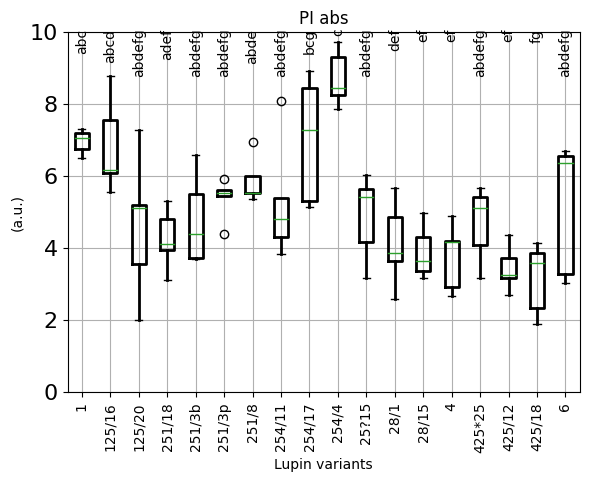

In [ ]:

#Now to plot like R with a violing plot
fig,ax=plt.subplots()
data.boxplot(column=col_for_data, by=col_to_group,ax=ax,fontsize=16

# ,showmeans=True
,boxprops=dict(linewidth=2.0),whiskerprops=dict(linewidth=2.0))  #This makes the boxplot

grps=pd.unique(data[col_to_group].values)   #Finds the group names
grps.sort() # This is critical!  Puts the groups in alphabeical order to make it match the plotting

props=dict(facecolor='white',alpha=1)

for i,grp in enumerate(grps):   #I loop through the groups to make the scatters and figure out the axis labels.
    '''
    x = np.random.normal(i+1, 0.15, size=len(data[data[col_to_group]==grp][col_for_data]))
    ax.scatter(x,data[data[col_to_group]==grp][col_for_data],alpha=0.5,s=2)

    # unnecessary replacement of actual variant names with averages

    name="{}\navg={:0.2f}\n(n={})".format(grp
                            ,data[data[col_to_group]==grp][col_for_data].mean()
                            ,data[data[col_to_group]==grp][col_for_data].count())
    '''
    #df_nms['names'][i]=name
    ax.text(i+1,ax.get_ylim()[1]*1,df_ltr.sum(axis=1)[i],rotation=90,fontsize=10,verticalalignment='top',horizontalalignment='center')

ax.set_xticklabels(grps,rotation=90,fontsize=10)

ax.set_ylim([0, 10])
ax.set(title='PI abs', ylabel='(a.u.)', xlabel="Lupin variants")
fig.suptitle('')

fig.savefig('anovatest.jpg',dpi=600,bbox_inches='tight')